<a href="https://colab.research.google.com/github/Anshul-Baghel-03/Unsupervised-ML-Clustering/blob/main/Myntra_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Myntra Online Retail Customer Segmentation

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Anshul Baghel (Individual)

# **Project Summary -**

Myntra is a leading Indian fashion e-commerce company known for its wide range of clothing, accessories, and lifestyle products. While Myntra is recognized primarily for fashion, this dataset relates to the company's online retail operations for Myntra Gifts Ltd., a UK-based division specializing in unique all-occasion giftware. This dataset spans transactions from December 1, 2009, to December 9, 2011, and includes detailed records of sales made through Myntra Gifts Ltd.’s non-store online platform. The dataset provides a thorough snapshot of the company's international online retail activities during this period.

# **GitHub Link -**

# **Problem Statement**


The primary purpose of analyzing this dataset is to extract valuable insights to enhance Myntra Gifts Ltd.'s business strategies.

Specific goals include:

**1. Identifying Purchasing Trends:**

Understanding patterns in customer purchases over time, including seasonal trends and product preferences, to better align inventory and marketing strategies.

**2. Evaluating Product Performance:**

Assessing which products are most and least popular to optimize product offerings and make informed decisions about stock management and new product introductions.

**3. Understanding Customer Behavior:**

Analyzing customer buying habits, frequency of purchases, and geographic distribution to tailor marketing efforts and improve customer segmentation.

**4. Optimizing Pricing Strategies:**

Evaluating the relationship between unit prices and sales volume to refine pricing models and maximize revenue while ensuring competitive pricing.

**5. Streamlining Inventory Management:**

Using sales and demand data to enhance inventory planning, reduce instances of overstock and stockouts, and improve overall inventory efficiency.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [11]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load Dataset
data_path = "/content/drive/MyDrive/Colab Notebooks/Online Retail.csv"
Myntra_Data = pd.read_csv(data_path)

### Dataset First View

In [184]:
# Dataset First Look
Myntra_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [183]:
# Dataset Rows & Columns count
Myntra_Data.shape

(541909, 8)

### Dataset Information

In [182]:
# Dataset Info
Myntra_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [181]:
# Dataset Duplicate Value Count
Myntra_Data.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [180]:
# Missing Values/Null Values Count
Myntra_Data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


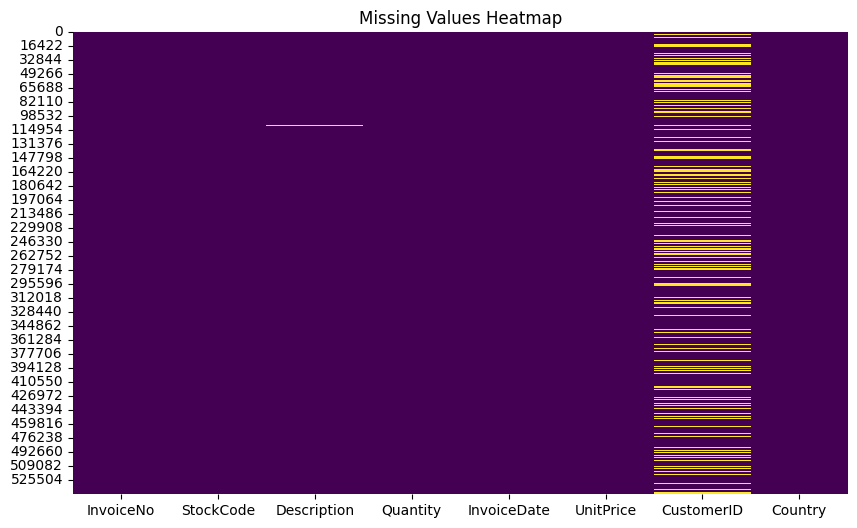

In [179]:
# Visualizing the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(Myntra_Data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

- Data shape is (541909,8) means it has 541909 rows and 8 columns.
- Data has 5268 duplicated values.
- Also there are missing values in the data.
  - **Description** column has **1454** missing values.
  - **Customer ID** column is having **135080** missing values.

## ***2. Understanding Your Variables***

In [178]:
# Dataset Columns
Myntra_Data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [177]:
# Dataset Describe
Myntra_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Variables Description

- **InvoiceNo :** This variable represents the invoice or transaction number assigned to each purchase.

- **StockCode :** The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory.

- **Description :** The Description variable provides a brief description of the product purchased in each transaction.

- **Quantity :** This represents the quantity of the product bought by the customer.

- **InvoiceDate :** The InvoiceDate variable indicates the date and time when each transaction took place.

- **UnitPrice :** This variable represents the price of each unit of the product.

- **CustomerID :** The CustomerID variable serves as a unique identifier assigned to each customer.

- **Country :** The Country variable represents the location where customer resides or where the transaction took place.

### Check Unique Values for each variable.

In [176]:
# Check Unique Values for each variable.
for i in Myntra_Data.columns:
  print(f"No. of unique values in {i} : {Myntra_Data[i].nunique()}")

No. of unique values in InvoiceNo : 25900
No. of unique values in StockCode : 4070
No. of unique values in Description : 4223
No. of unique values in Quantity : 722
No. of unique values in InvoiceDate : 23260
No. of unique values in UnitPrice : 1630
No. of unique values in CustomerID : 4372
No. of unique values in Country : 38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [175]:
# Create a copy of original dataframe
Myntra_df = Myntra_Data.copy()

In [172]:
# Drop rows where 'CustomerID' is missing
Myntra_df.dropna(subset=['CustomerID'], inplace=True)

In [173]:
Myntra_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Day,0
Year,0


In [170]:
# Removing Duplicates
Myntra_df = Myntra_df.drop_duplicates()

In [174]:
Myntra_df.duplicated().sum()

np.int64(0)

In [168]:
Myntra_df.shape

(392692, 16)

In [167]:
# Remove rows with negative or zero Quantity and UnitPrice
Myntra_df = Myntra_df[(Myntra_df['Quantity'] > 0) & (Myntra_df['UnitPrice'] > 0)]

# Remove the cancelled orders and only consider the actual orders in the dataset
Myntra_df = Myntra_df[~Myntra_df['InvoiceNo'].astype(str).str.startswith('C')]

In [166]:
# Convert 'InvoiceDate' to datetime format
Myntra_df['InvoiceDate'] = pd.to_datetime(Myntra_df['InvoiceDate'], format = "%m/%d/%y %H:%M")

In [165]:
# Convert 'CustomerID' to integer
Myntra_df['CustomerID'] = Myntra_df['CustomerID'].astype(int)

In [163]:
# Extract Date Features
Myntra_df['Day'] = Myntra_df['InvoiceDate'].dt.day_name()       # Weekday name
Myntra_df['Year'] = Myntra_df['InvoiceDate'].dt.year            # Year
Myntra_df['Month_num'] = Myntra_df['InvoiceDate'].dt.month      # Numeric month
Myntra_df['Day_num'] = Myntra_df['InvoiceDate'].dt.day          # Day of the month
Myntra_df['Hour'] = Myntra_df['InvoiceDate'].dt.hour            # Hour
Myntra_df['Minute'] = Myntra_df['InvoiceDate'].dt.minute        # Minute
Myntra_df['Month'] = Myntra_df['InvoiceDate'].dt.month_name()   # Full month name

In [162]:
# Create a 'Purchase_Amount' Column
Myntra_df['Purchase_Amount'] = Myntra_df['Quantity'] * Myntra_df['UnitPrice']

### What all manipulations have you done and insights you found?

1. **Handled Missing Values:**  
   - Dropped rows where `CustomerID` is missing.

2. **Removed Invalid Transactions:**  
   - Removed rows where **`Quantity` or `UnitPrice` ≤ 0** (invalid transactions).  
   - Filtered out **cancelled orders** (i.e., `InvoiceNo` starting with `"C"`).  

3. **Converted Data Types:**  
   - Converted `InvoiceDate` to **datetime** format for time-based analysis.  
   - Converted `CustomerID` to **integer** for consistency.  

4. **Removed Duplicates:**  
   - Dropped duplicate records to avoid redundancy in analysis.  

5. **Created New Features:**  
   - Extracted **Year, Month, Day, Weekday, and Hour** from `InvoiceDate` for time-based insights.  
   - Created a **`Purchase_Amount` column** (`Quantity * UnitPrice`) to measure sales performance.  


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 : Top 10 Most sold products**

In [160]:
# Most sold product on the basis of count of each product description
Myntra_df['Description'].value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2016
REGENCY CAKESTAND 3 TIER,1713
JUMBO BAG RED RETROSPOT,1615
ASSORTED COLOUR BIRD ORNAMENT,1395
PARTY BUNTING,1389
LUNCH BAG RED RETROSPOT,1303
SET OF 3 CAKE TINS PANTRY DESIGN,1152
POSTAGE,1099
LUNCH BAG BLACK SKULL.,1078


Text(0.5, 0, 'Product Description')

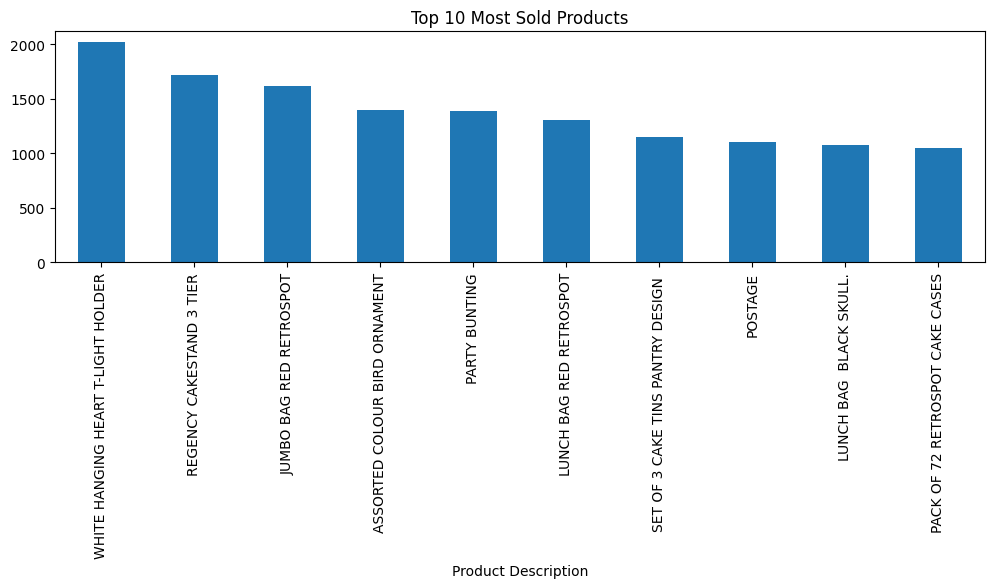

In [161]:
# Bar plot of top 10 most sold products
plt.figure(figsize=(12, 3))
Myntra_df['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Description')

##### 1. Why did you pick the specific chart?

I used bar chart to see which product comes under top 10 category according to count, means which are the top 10 most sold products.

##### 2. What is/are the insight(s) found from the chart?

I got to know that :
- `WHITE HANGING HEART T-LIGHT HOLDER` is the most sold product having the count of `2016`

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights can be highly valuable for improving business strategies.

- Company should keep `WHITE HANGING HEART T-LIGHT HOLDER` well-stocked and consider bundling & promotions.

#### **Chart - 2 : Top 10 Best Selling products (Products generated highest revenue)**

Text(0.5, 1.0, 'Top 10 Best Selling Products')

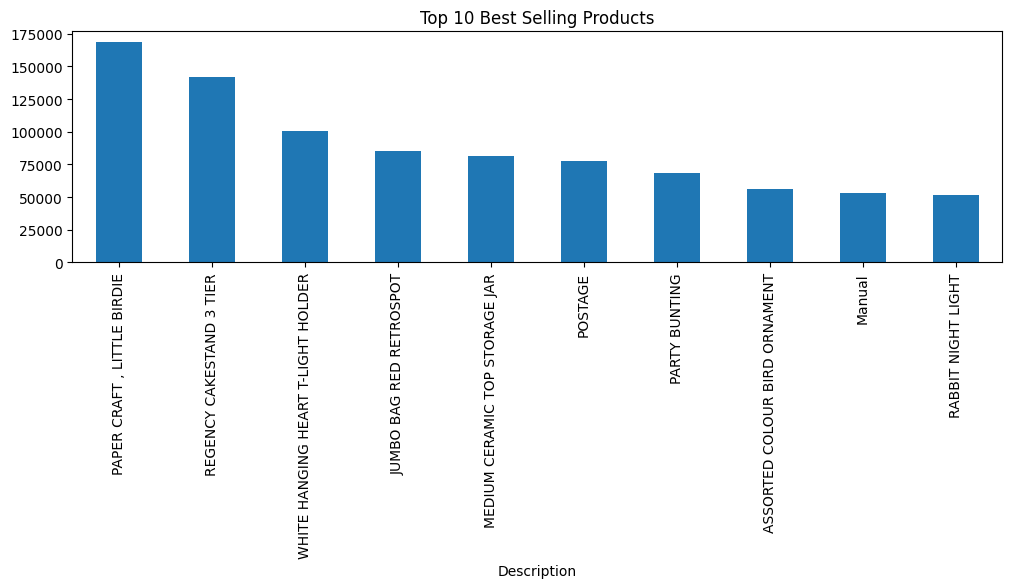

In [158]:
# Barplot of best selling products
plt.figure(figsize=(12, 3))
Myntra_df.groupby('Description')['Purchase_Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Best Selling Products')

##### 1. Why did you pick the specific chart?

I used bar chart to see which product comes under top 10 category according to revenue generation.

##### 2. What is/are the insight(s) found from the chart?

 With the help of the above visualiation we can say that :
 - `PAPER CRAFT , LITTLE BIRDIE` is highest in generating revenue having the total purchase amount of `168469.60`

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights can be highly valuable for improving business strategies.

- Company should ensure consistent supply & pricing for `PAPER CRAFT, LITTLE BIRDIE` to maximize revenue.

#### **Chart - 3 : Sales Trends Over Months**

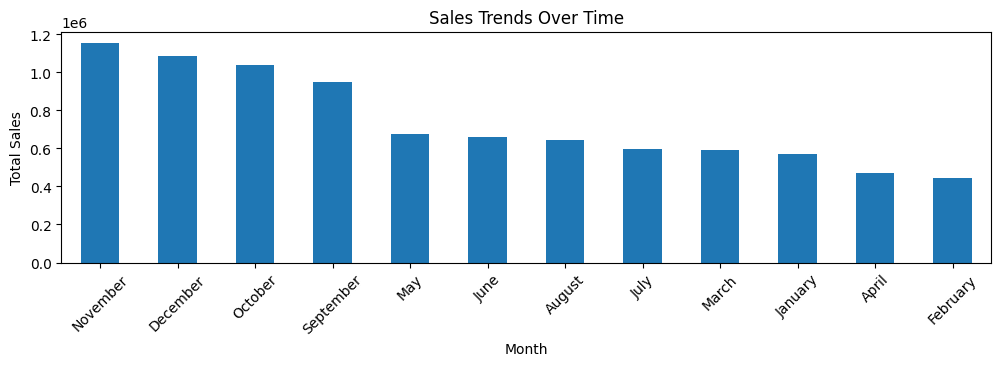

In [157]:
# Chart - 2 : Sales Trends Over Time
plt.figure(figsize = (12, 3))
Myntra_df.groupby('Month')['Purchase_Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To check for the month in which we get high sales.

##### 2. What is/are the insight(s) found from the chart?

I found that in the months of `November`, `December` and `October`, company got the highest sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a good actionable insight which can help company.
- Company can plan better using this info to maximise sales during these month by using dynamic pricing or giving some offers.

#### **Chart - 4 : Customer Segmentation Based on Purchase Frequency**

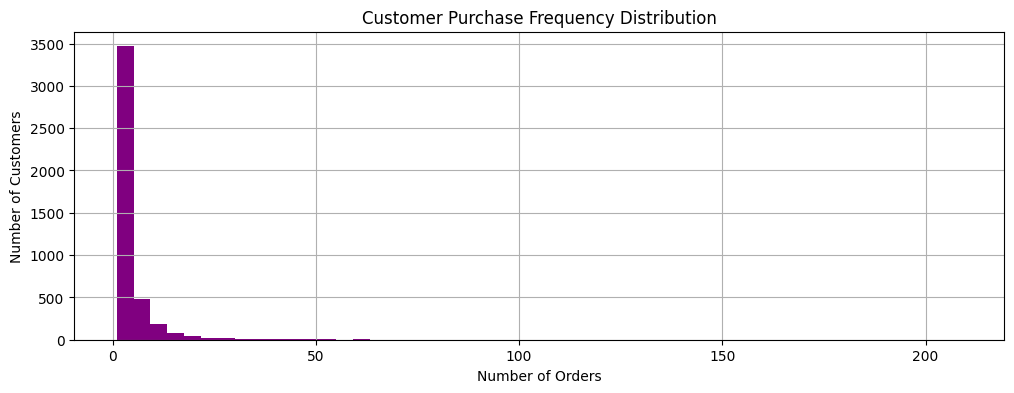

In [156]:
# Chart - 4 : Customer Segmentation Based on Purchase Frequency
customer_order_counts = Myntra_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Sorting in descending order
customer_order_counts = customer_order_counts.sort_values(ascending = False)

# Plot the histogram
plt.figure(figsize=(12,4))
customer_order_counts.hist(bins=50, color='purple')
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()


##### 1. Why did you pick the specific chart?

To check for the purchase frequency of the customers.

##### 2. What is/are the insight(s) found from the chart?

- The distribution is `highly skewed to the right.`
- This suggests that `most customers are one-time or occasional buyers` who have placed only a few orders (mostly between 1-10)., while very few customers with a high number of orders (above 50).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that :
1. The majority of customers purchase only once or a few times.
2. There’s a small group of loyal customers who make multiple purchases.

The company could implement loyalty programs or personalized offers to encourage repeat purchases from one-time buyers.

#### **Chart - 5 : Sales Distribution by Country**

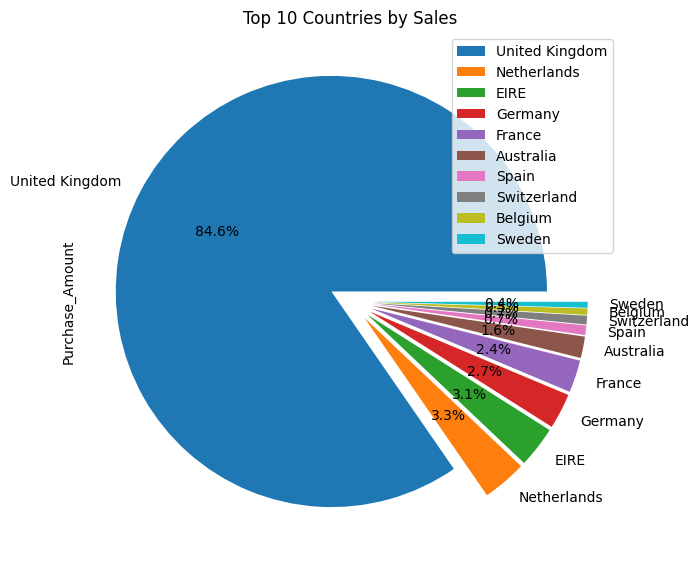

In [155]:
# Chart - 5 : Sales Distribution by Country
country_sales = Myntra_df.groupby('Country')['Purchase_Amount'].sum().sort_values(ascending=False).head(10)
explode_values = [0.1] * len(country_sales)
country_sales.plot(kind='pie', labels = country_sales.index, autopct='%1.1f%%', explode = explode_values, figsize=(7,7), title="Top 10 Countries by Sales")
plt.legend()

##### 1. Why did you pick the specific chart?

Pie chat is used to analyze the `top 10 countries by sales`, helping us understand how sales are distributed geographically.

##### 2. What is/are the insight(s) found from the chart?

**Insights gained from the chart** :
- The UK contributes 84.6% of the total revenue, making it the most significant market for Myntra Gifts Ltd.
- The remaining 9 countries combined contribute only about 15.4% of total sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Company should expand into emerging markets with strategic marketing campaigns.
- Reduce dependence on the UK by improving sales in other high-potential countries.
- Conduct customer behavior analysis to understand low-performing markets better.

#### **Chart - 6 : Hourly Purchase Pattern**

<Axes: title={'center': 'Sales by Hour of the Day'}, xlabel='Hour'>

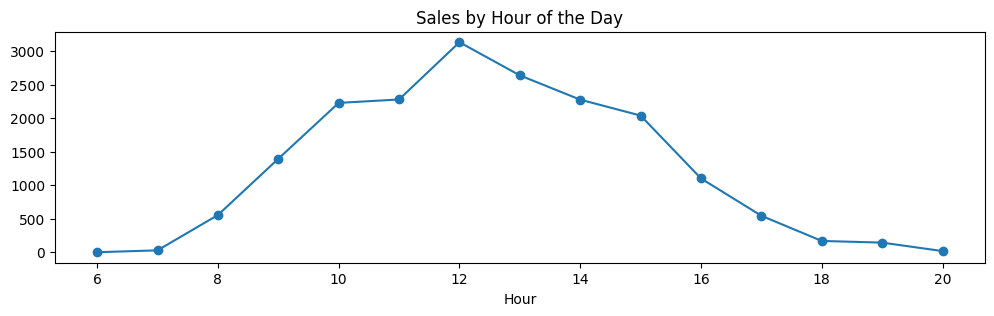

In [154]:
# Chart - 6 : Hourly Purchase Pattern
hourly_orders = Myntra_df.groupby('Hour')['InvoiceNo'].nunique()
hourly_orders.plot(kind='line', figsize=(12,3), marker='o', title="Sales by Hour of the Day")

##### 1. Why did you pick the specific chart?

A line chart effectively visualizes trends over time, showing fluctuations in sales volume by the hour.

##### 2. What is/are the insight(s) found from the chart?

**Insights Gained** :
- Sales increase sharply after 7 AM, peaking at midday (12 PM - 1 PM).
- The lowest sales occurring after 6 PM.
- This suggests that most customers prefer shopping during working hours (morning to early afternoon).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Company should Optimize marketing campaigns by targeting peak hours.
- Ensure stock availability before peak sales periods.
- Adjust staffing & logistics to handle high traffic efficiently.

#### **Chart - 7 : Sales Performance by Day of the Week**

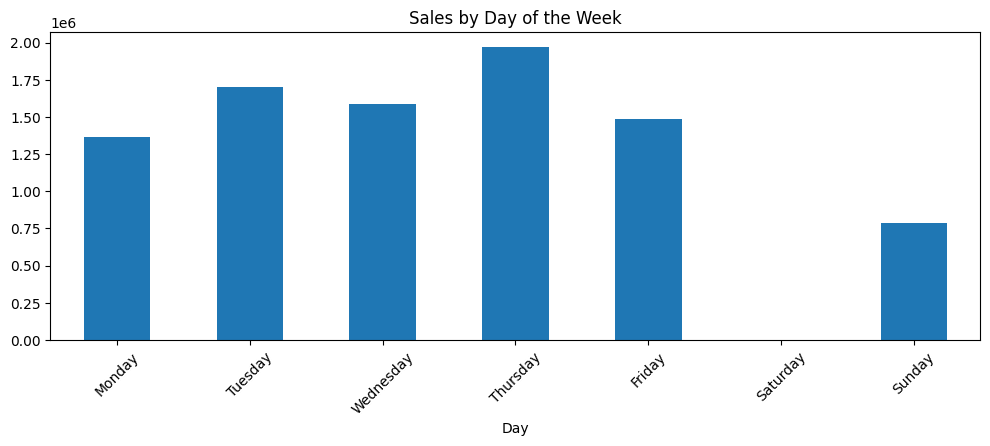

In [153]:
# Chart - 7 : Sales Performance by Day of the Week
sales_by_day = Myntra_df.groupby('Day')['Purchase_Amount'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sales_by_day.plot(kind='bar', figsize=(12,4), title="Sales by Day of the Week")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively compares total sales across different days, making it easy to spot trends in purchasing behavior.

##### 2. What is/are the insight(s) found from the chart?1

**Insights Gained :**
- Thursday has the highest sales, followed by Tuesday and Wednesday.
- Sunday has the lowest sales, indicating weak weekend performance.
- Sales are strongest on weekdays, peaking midweek.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact :**
- Plan promotions & discounts on slower days (e.g., weekends).
- Launch targeted marketing campaigns on high-traffic days to maximize sales.

#### **Chart - 8 : Hourly Purchases by Top 10 Countries**

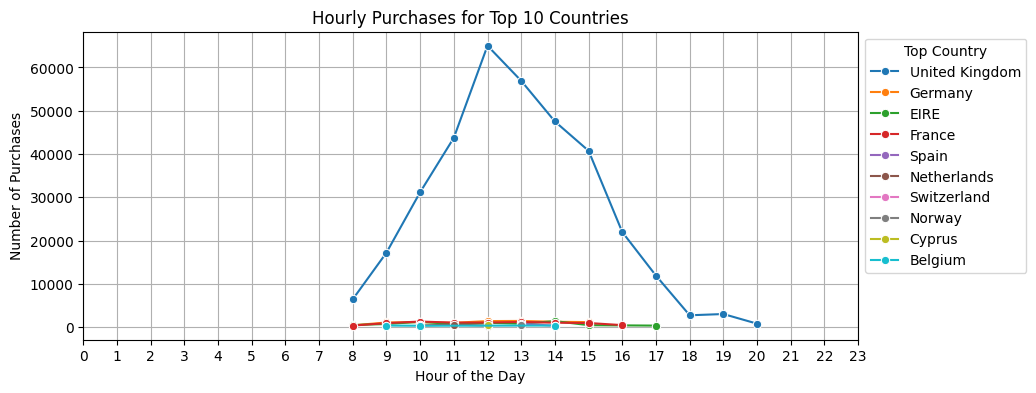

In [152]:
# Chart - 8 : Hourly Purchases by Top 10 Countries

# Group by Country and Hour to count purchases
hourly_sales = Myntra_df.groupby(['Country', 'Hour'])['InvoiceNo'].count().sort_values(ascending=False).reset_index().head(50)

# Plot the data
plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_sales, x='Hour', y='InvoiceNo', hue='Country', marker="o", palette="tab10")
plt.title("Hourly Purchases for Top 10 Countries")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Purchases")
plt.xticks(range(0, 24))
plt.legend(title="Top Country", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I used line plot for showing trends over time, making it easy to observe purchasing patterns by hour across different countries.

##### 2. What is/are the insight(s) found from the chart?

- Most purchases occur between `8 AM and 4 PM`, with a `sharp peak around 12 PM`.
- `United Kingdom` has significantly higher purchase activity than other countries.
- Most countries have steady purchase patterns throughout the day, with smaller peaks aligning with UK trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Company should schedule promotions and ads according to peak purchase hours.
- Company should also make some country based strategies to Focus on UK but also identify growth opportunities in other countries.

#### **Chart - 9 : Top 10 highest-spending customers**

In [150]:
# Chart - 9 : Average Purchase amount of customers
Myntra_df.groupby('CustomerID')['Purchase_Amount'].mean().sort_values(ascending=False).head(10)

,Purchase_Amount
CustomerID,
12346,77183.600000
16446,56157.500000
15098,13305.500000
15749,4453.430000
15195,3861.000000
13135,3096.000000
17846,2033.100000
18087,2027.860000
16532,1687.200000


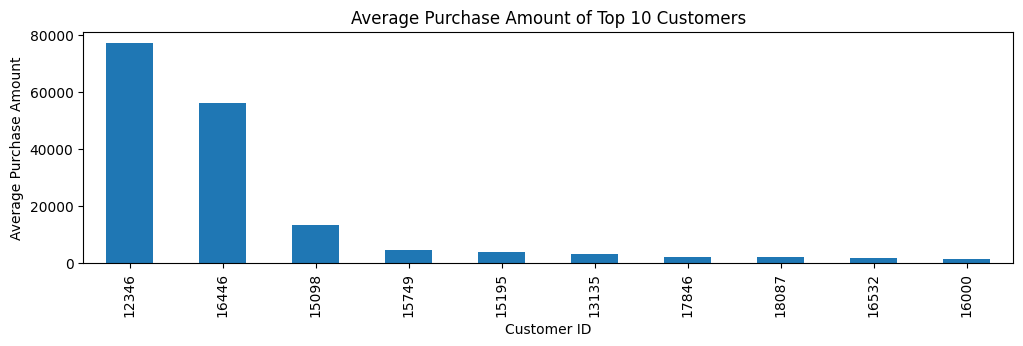

In [151]:
# Plot average order value of top 10 customers
plt.figure(figsize=(12, 3))
Myntra_df.groupby('CustomerID')['Purchase_Amount'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Purchase Amount of Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Average Purchase Amount')
plt.show()

##### 1. Why did you pick the specific chart?

I used this chart to visualizes the average purchase amount of the top 10 highest-spending customers, helping to identify the most valuable customers.

##### 2. What is/are the insight(s) found from the chart?

**Insights gained:**
- A few customers contribute significantly more to revenue than others.
- Large amount of revenue may be dependent on a small group of customers.
- Some customers spend far more than others, meaning they should be prioritized for retention and personalized offers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**
- Company should do something for such customers. Ex. - introducing exclusive offers, discounts, or memberships for top customers.
- As it is not good if too much revenue depends on a small number of customers, company should do something to diversify this.

#### **Chart - 10 : Average quantity per order**

In [147]:
# Checking for Average quantity per order
Myntra_df.groupby('InvoiceNo')['Quantity'].mean().sort_values(ascending=False).head(10)

,Quantity
InvoiceNo,
581483,80995.0
541431,74215.0
554868,4300.0
544612,3906.0
560599,3186.0
573995,3000.0
543669,2400.0
544152,2400.0
573003,2400.0


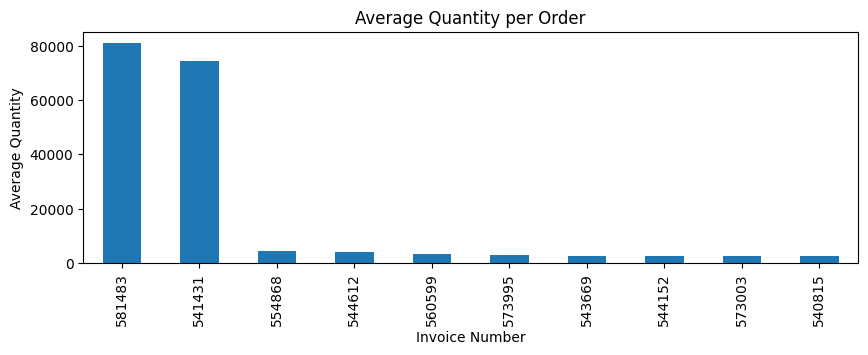

In [148]:
# Chart - 10 : Average quantity per order
plt.figure(figsize=(10, 3))
Myntra_df.groupby('InvoiceNo')['Quantity'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Quantity per Order')
plt.xlabel('Invoice Number')
plt.ylabel('Average Quantity')
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart visualizes average quantity per order for the top 10 invoices, helping to identify bulk purchases.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart:**
- Some invoices contain exceptionally high quantities, which could indicate wholesale buyers.
- Only a few invoices dominate the quantity metric, while most orders have significantly lower volumes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact on business:**
- Extremely high quantities in a few invoices could indicate data anomalies or bulk purchase deals.
- Company should Identify wholesale buyers and offer special deals or B2B pricing.
- Investigate outliers to confirm if high-quantity orders are valid or require adjustments.
- Company should to ensure stock availability for bulk buyers.

#### **Chart - 11 : Distribution of Quantity Column**

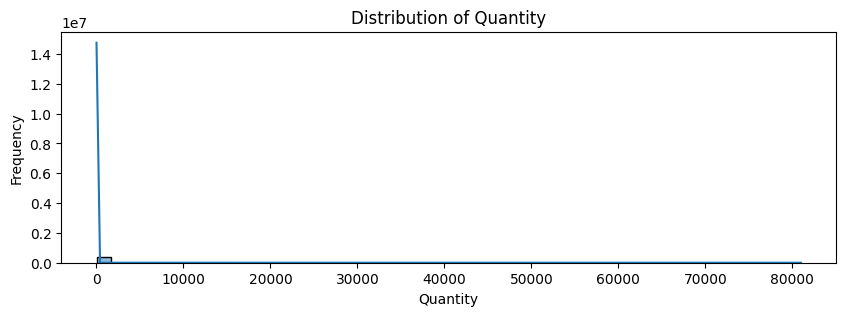

In [146]:
# Chart - 11 : Distribution of Quantity Column
plt.figure(figsize=(10, 3))
sns.histplot(Myntra_df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

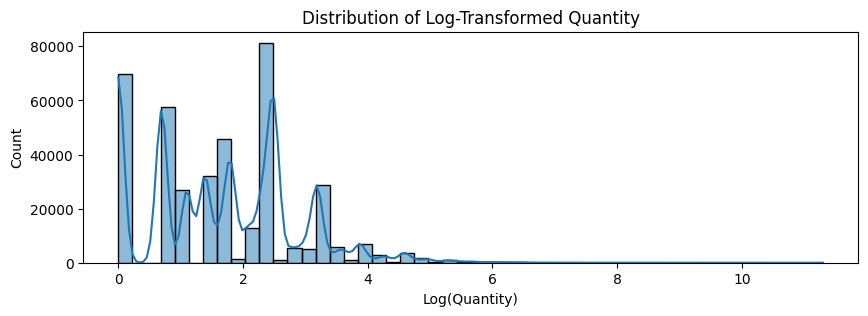

In [149]:
# Visualising log transformation to the quantity column
plt.figure(figsize=(10, 3))
sns.histplot(np.log(Myntra_df['Quantity']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Quantity')
plt.xlabel('Log(Quantity)')
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart visualizes the distribution of quantity.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart:**
- Most orders have small quantities, while a few orders contain very large quantities.
- A small number of customers are making bulk purchases, possibly wholesalers or resellers.
- The majority of customers prefer buying in small amounts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Company should focus on frequently ordered small quantities while ensuring stock availability for bulk buyers.
- Offer bulk purchase discounts for high-quantity buyers and incentives for small-quantity buyers to increase order size.
- Prepare for demand spikes from bulk buyers.

#### **Chart - 12 : Distribution of Unit Price Column**

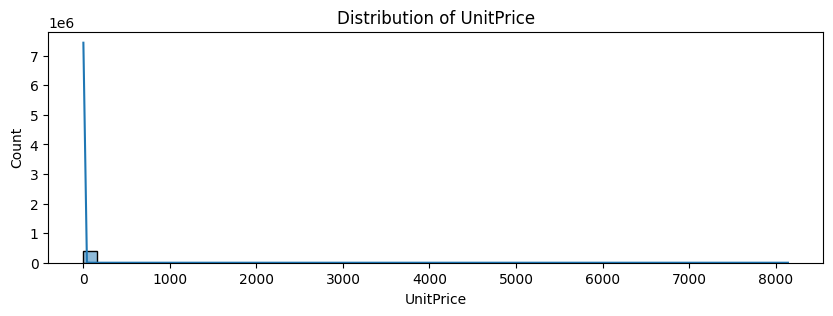

In [145]:
# Chart - 11 : Distribution of UnitPrice Column
plt.figure(figsize=(10, 3))
sns.histplot(Myntra_df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.show()

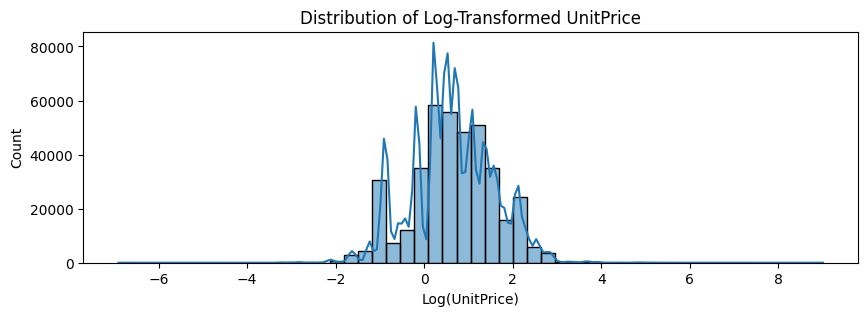

In [49]:
# Visualising log transformation to the quantity column
plt.figure(figsize=(10, 3))
sns.histplot(np.log(Myntra_df['UnitPrice']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed UnitPrice')
plt.xlabel('Log(UnitPrice)')
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart visualizes the distribution of UnitPrice.

##### 2. What is/are the insight(s) found from the chart?

A right-skewed distribution for the UnitPrice column indicates that most products are priced at the lower end, while a few high-priced items significantly increase the range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Maintain a balance between affordable and high-end products to cater to a wider audience and maximize profitability.

#### **Chart - 13 : Distribution of Purchase Amount Column**

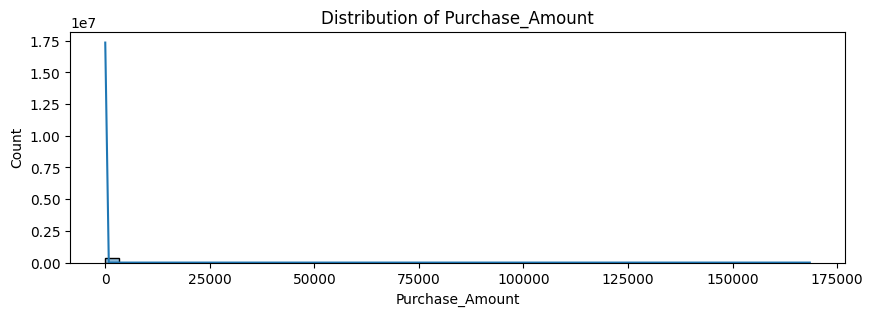

In [144]:
# Chart - 11 : Distribution of UnitPrice Column
plt.figure(figsize=(10, 3))
sns.histplot(Myntra_df['Purchase_Amount'], bins=50, kde=True)
plt.title('Distribution of Purchase_Amount')
plt.xlabel('Purchase_Amount')
plt.show()

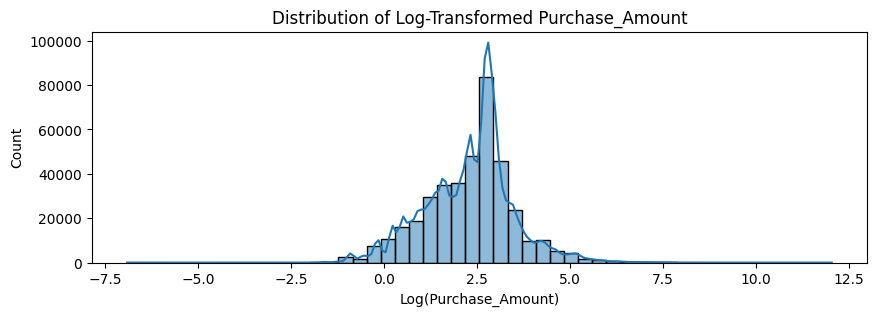

In [51]:
# Visualising log transformation to the quantity column
plt.figure(figsize=(10, 3))
sns.histplot(np.log(Myntra_df['Purchase_Amount']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Purchase_Amount')
plt.xlabel('Log(Purchase_Amount)')
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart visualizes the distribution of Purchase Amount.

##### 2. What is/are the insight(s) found from the chart?

A **right-skewed distribution** for the **Purchase_Amount** column suggests that most customers make small purchases, while a few high-spending customers contribute significantly to the total revenue.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Implications:**  
- Analyze high-value transactions to understand customer preferences and adjust inventory, pricing, and promotional strategies accordingly.

## ***5. Hypothesis Testing*** - (Not Required)

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## **RFM Model (Recency, Frequency and Monetary Value)**

The RFM model is a customer segmentation technique used in marketing and business analytics to categorize customers based on their purchasing behavior.

1. **Recency (R)** – How recently a customer made a purchase.
(Recent customers are more likely to buy again.)
2. **Frequency (F)** – How often a customer makes a purchase.
(Frequent buyers are valuable and engaged customers.)
3. **Monetary (M)** – How much money a customer has spent.
(High spenders contribute more revenue.)

In [132]:
# Check for the latest date from the dataset
Myntra_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [133]:
""" Setting Latest date as 2011-12-10 because last invoice date was 2011-12-09.
Adding one extra day to ensure all calculations consider transactions up to the last full day. """

Latest_Date = dt.datetime(2011,12,10)

In [134]:
Latest_Date

datetime.datetime(2011, 12, 10, 0, 0)

In [135]:
# ----------- Calculating RFM (Recency, Frequency and Monetary Value) ---------- #

# Recency = Latest Date - Last Inovice Data,
# Frequency = count of invoice no. of transaction(s),
# Monetary = Sum of Total Amount for each customer

# Calculate RFM Scores for each customer
rfm_df = Myntra_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                              'InvoiceNo': lambda x: len(x),
                                              'Purchase_Amount': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Purchase_Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,18,73,1757.55
4,12350,310,17,334.40


In [136]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,306.482500
50%,50.000000,41.000000,668.570000
75%,141.750000,98.000000,1660.597500
max,373.000000,7676.000000,280206.020000


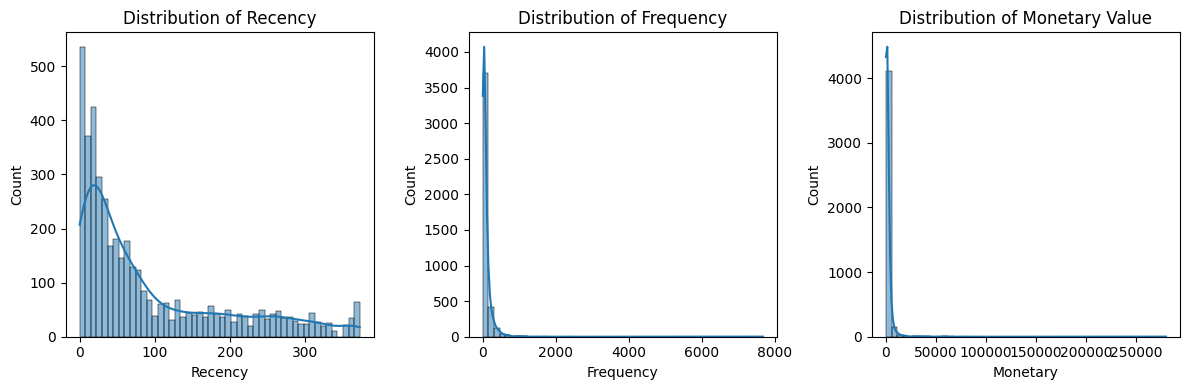

In [137]:
# Recency, Frequency and Monetary DIstribution plot
plt.figure(figsize=(12, 4))

# Plotting the Recency value
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=50, kde=True)
plt.title('Distribution of Recency')

# Plotting the Frequency value
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=50, kde=True)
plt.title('Distribution of Frequency')

# Plotting the Monetary value
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=50, kde=True)
plt.title('Distribution of Monetary Value')

plt.tight_layout()
plt.show()

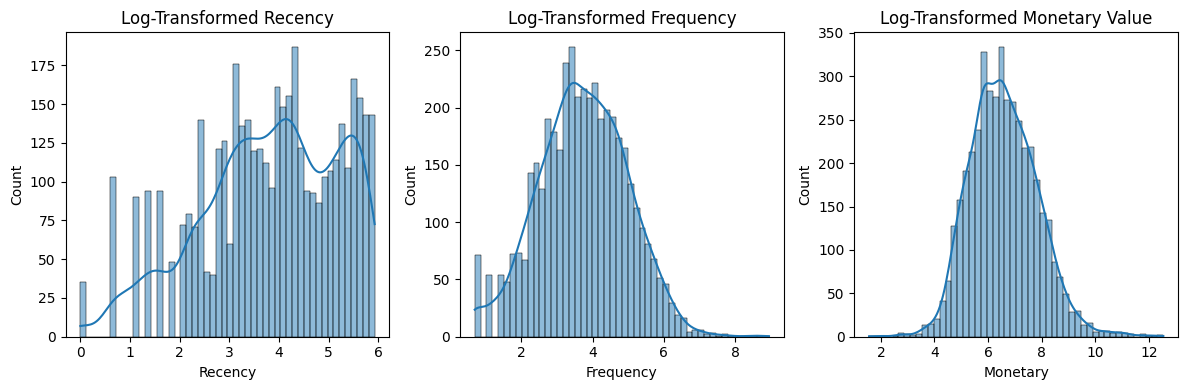

In [138]:
# Plotting log transformed Recency, Frequency and Monetary distribution
rfm_df_log = np.log(rfm_df + 1)

plt.figure(figsize=(12, 4))

# Plotting transformed Recency value
plt.subplot(1, 3, 1)
sns.histplot(rfm_df_log['Recency'], bins=50, kde=True)
plt.title('Log-Transformed Recency')

# Plotting transformed Frequency value
plt.subplot(1, 3, 2)
sns.histplot(rfm_df_log['Frequency'], bins=50, kde=True)
plt.title('Log-Transformed Frequency')

# Plotting Transformed Monetary value
plt.subplot(1, 3, 3)
sns.histplot(rfm_df_log['Monetary'], bins=50, kde=True)
plt.title('Log-Transformed Monetary Value')

plt.tight_layout()
plt.show()

In [140]:
# ---------- Splitting into 4 segments using Quantiles ---------- #

# Compute quantiles for Recency, Frequency, and Monetary
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75]).to_dict()


In [141]:
# ---------- Defining scoring using `pd.cut()` ---------- #

rfm_df['R'] = pd.cut(rfm_df['Recency'], bins=[-1, quantiles['Recency'][0.25], quantiles['Recency'][0.50],
                                              quantiles['Recency'][0.75], rfm_df['Recency'].max()], labels=[4, 3, 2, 1])

rfm_df['F'] = pd.cut(rfm_df['Frequency'], bins=[-1, quantiles['Frequency'][0.25], quantiles['Frequency'][0.50],
                                                quantiles['Frequency'][0.75], rfm_df['Frequency'].max()], labels=[1, 2, 3, 4])

rfm_df['M'] = pd.cut(rfm_df['Monetary'], bins=[-1, quantiles['Monetary'][0.25], quantiles['Monetary'][0.50],
                                               quantiles['Monetary'][0.75], rfm_df['Monetary'].max()], labels=[1, 2, 3, 4])


In [142]:
# Convert categorical scores to integer type
rfm_df[['R', 'F', 'M']] = rfm_df[['R', 'F', 'M']].astype(int)

# Create RFMGroup as a concatenated string
rfm_df['RFMGroup'] = rfm_df[['R', 'F', 'M']].astype(str).agg(''.join, axis=1)

# Calculate RFMScore as the sum of R, F, and M
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,18,73,1757.55,3,3,4,334,10
12350,310,17,334.40,1,1,2,112,4


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [143]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

- Dropped rows where `CustomerID` is missing.
- Dropped duplicate records to avoid redundancy in analysis.

### 2. Handling Outliers - NA

##### What all outlier treatment techniques have you used and why did you use those techniques?

No need to do outlier treatment here.

### 3. **Categorical Encoding** - NA

#### What all categorical encoding techniques have you used & why did you use those techniques?

Not required.

### 4. **Textual Data Preprocessing** - Not needed here
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [131]:
# Expand Contraction

#### 2. Lower Casing

In [68]:
# Lower Casing

#### 3. Removing Punctuations

In [69]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [70]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [71]:
# Remove Stopwords

In [72]:
# Remove White spaces

#### 6. Rephrase Text

In [73]:
# Rephrase Text

#### 7. Tokenization

In [74]:
# Tokenization

#### 8. Text Normalization

In [75]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [76]:
# POS Taging

#### 10. Text Vectorization

In [77]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

**Created New Features:**  
   - Extracted **Year, Month, Day, Weekday, and Hour** from `InvoiceDate` for time-based insights.  
   - Created a **`Purchase_Amount` column** `(Quantity * UnitPrice)` to measure sales performance.

#### 2. Feature Selection - NA

##### What all feature selection methods have you used  and why?

Not needed.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [130]:
# Applying Log transformation to recency, frequency and monetary and creating new column in rfm df
rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, Data needs to be transformed because `Recency, Frequency, and Monetary (RFM) scores are right-skewed.`

I am using `Log Transformation` because it can help normalise the data.
This is useful because models like K-Means, perform better on normally distributed data.

### 6. Data Scaling - NA

In [129]:
# Scaling the Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency_log', 'Frequency_log', 'Monetary_log']])
X = rfm_scaled

##### Which method have you used to scale you data and why?

I have used standard scaler to scale the data to make it ready for further model implementation.

### 7. Dimesionality Reduction - NA

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [80]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting - NA

In [81]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset - NA

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [128]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model 1 : K Means Clustering

Applying Silhouette Score Method on RFM

In [115]:
# Determining the best value of k using silhoutte method
sil_scores_list = []

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    sil_scores_list.append(score)

    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4002688988403715
For n_clusters = 3, silhouette score is 0.30465988575215636
For n_clusters = 4, silhouette score is 0.3072476910734449
For n_clusters = 5, silhouette score is 0.27694361686901425
For n_clusters = 6, silhouette score is 0.27526846261369087
For n_clusters = 7, silhouette score is 0.263278335246436
For n_clusters = 8, silhouette score is 0.26070561125088365
For n_clusters = 9, silhouette score is 0.2547019461481841
For n_clusters = 10, silhouette score is 0.23647011689893754
For n_clusters = 11, silhouette score is 0.24751305055496983
For n_clusters = 12, silhouette score is 0.2663257271824818
For n_clusters = 13, silhouette score is 0.2545485454968601
For n_clusters = 14, silhouette score is 0.2504446915272186
For n_clusters = 15, silhouette score is 0.25630388769195545


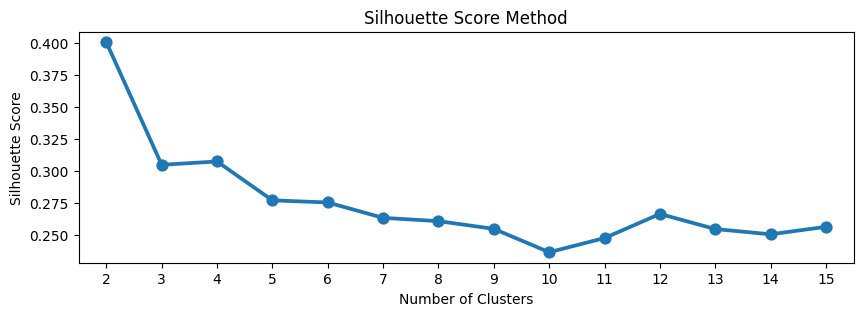

In [116]:
# Visualise silhouette score
plt.figure(figsize=(10, 3))
sns.pointplot(x = range_n_clusters, y = sil_scores_list)
plt.title("Silhouette Score Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

**Observations from Silhuette Method :**
- For 2 clusters, we got the best silhuette score.
- We can also consider 3, 4 number of clusters for further analysis.

Applying Elbow method on RFM

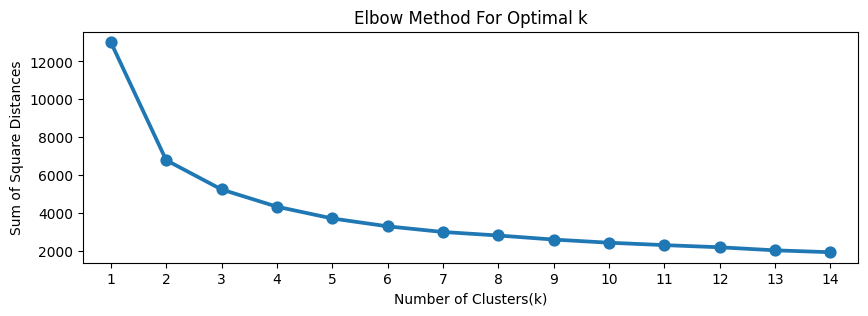

In [118]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

# Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(10,3))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Fitting kmeans with n_clusters = 2

In [119]:
# Implementing K-Means Clustering
kmeans = KMeans(n_clusters = 2)

# Fitting the algorithm
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

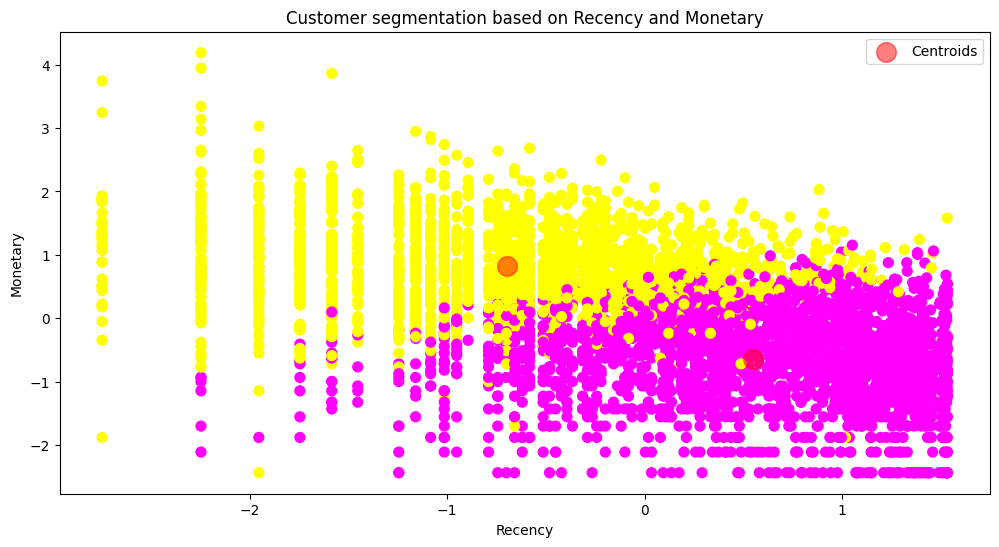

In [120]:
# Visualising customer segmentation based on Recency and Monetary
plt.figure(figsize=(12,6))
plt.title('Customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5, label = "Centroids")

plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend()
plt.show()

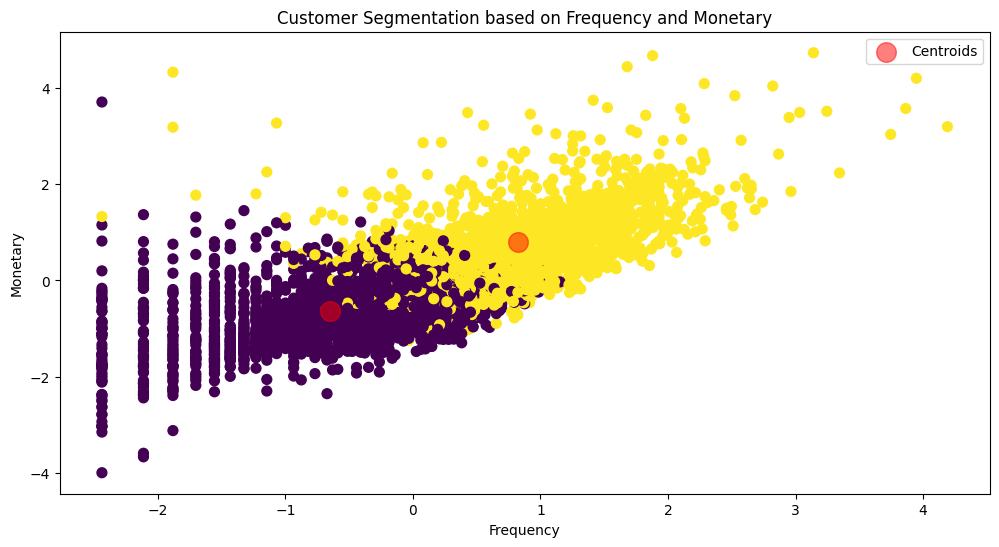

In [121]:
# Visualising customer segmentation based on Frequency and Monetary
plt.figure(figsize=(12, 6))
plt.title('Customer Segmentation based on Frequency and Monetary')

plt.scatter(X[:, 1], X[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.5, label="Centroids")

plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.legend()
plt.show()

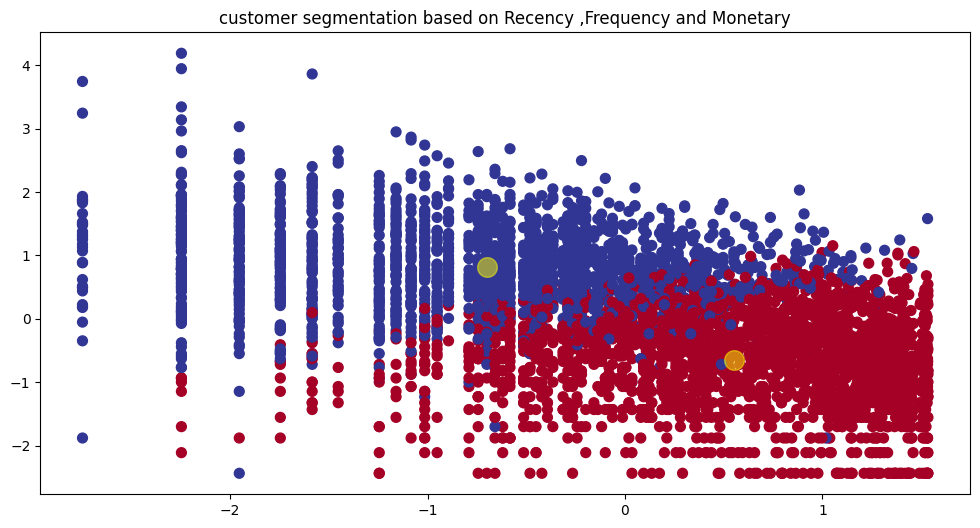

In [122]:
# Visualising customer segmentation based on Recency, Frequency and Monetary
plt.figure(figsize=(12,6))
plt.title('customer segmentation based on Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

In [123]:
# Assigning cluster labels
rfm_df['kmeans_clusters'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,kmeans_clusters,hierarchical_clusters,DBSCAN_clusters
CustomerID,,,,,,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,5.786897,0.693147,11.253955,0,1,-1
12347,2,182,4310.00,4,4,4,444,12,1.098612,5.209486,8.368925,1,0,0
12348,75,31,1797.24,2,2,4,224,8,4.330733,3.465736,7.494564,0,0,0
12349,18,73,1757.55,3,3,4,334,10,2.944439,4.304065,7.472245,1,0,0
12350,310,17,334.40,1,1,2,112,4,5.739793,2.890372,5.815324,0,1,0


In [124]:
# cluster label_0 summary
rfm_df[rfm_df['kmeans_clusters'] == 0][['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,2428.000000,2428.000000,2428.000000
mean,140.479407,24.778007,472.344873
std,106.448561,20.715223,1605.334842
min,1.000000,1.000000,3.750000
25%,50.000000,10.000000,190.162500
50%,108.000000,20.000000,332.125000
75%,225.000000,33.000000,572.643250
max,373.000000,174.000000,77183.600000


We can

In [126]:
# cluster label_1 summary
rfm_df[rfm_df['kmeans_clusters'] == 1][['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,1910.000000,1910.000000,1910.000000
mean,30.507853,174.100000,4052.542169
std,39.316658,320.156884,13151.564355
min,0.000000,1.000000,150.610000
25%,7.000000,68.000000,1070.665000
50%,18.000000,109.000000,1836.215000
75%,37.000000,192.000000,3397.607500
max,372.000000,7676.000000,280206.020000


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used `K-Means Clustering` , an unsupervised machine learning algorithm, to segment customers based on their `Recency, Frequency, and Monetary (RFM) values.` The goal was to group customers into similar clusters to identify distinct purchasing behaviors.

**Comparison of Cluster 0 and Cluster 1 after implementing K-Means Clustering**

In [127]:
# Visualizing evaluation Metric Score chart

# Specify the Column Names while initializing the Table
cluster_compare = PrettyTable(['Metric',"Cluster 0 (High Engagement)",'Cluster 1 (Low Engagement)'])

# Adding rows
cluster_compare.add_row(['Customer Count',	"1,920",	'2,418'])
cluster_compare.add_row(['Avg Recency',	"30.79 days (More recent)",	'140.71 days (Less recent)'])
cluster_compare.add_row(['Avg Frequency',	"173.53 purchases (High loyalty)",	'24.61 purchases (Low loyalty)'])
cluster_compare.add_row(['Avg Monetary',	"4,036.60 (High spenders)",	'470.19 (Low spenders)'])
cluster_compare.add_row(['Highest Spending Customer',	"280,206.02",	'77,183.60'])

print(cluster_compare)

+---------------------------+---------------------------------+-------------------------------+
|           Metric          |   Cluster 0 (High Engagement)   |   Cluster 1 (Low Engagement)  |
+---------------------------+---------------------------------+-------------------------------+
|       Customer Count      |              1,920              |             2,418             |
|        Avg Recency        |     30.79 days (More recent)    |   140.71 days (Less recent)   |
|       Avg Frequency       | 173.53 purchases (High loyalty) | 24.61 purchases (Low loyalty) |
|        Avg Monetary       |     4,036.60 (High spenders)    |     470.19 (Low spenders)     |
| Highest Spending Customer |            280,206.02           |           77,183.60           |
+---------------------------+---------------------------------+-------------------------------+


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- **Cluster 0** customers are high-value, repeat buyers : They should be rewarded with loyalty programs, exclusive discounts, and VIP offers.
- **Cluster 1** customers are inactive and low spenders : They need reactivation campaigns, discounts, and better engagement strategies.

### ML Model 2 : Hierarchical Clustering

**Plotting the Dendrogram to find optimal number of clusters**

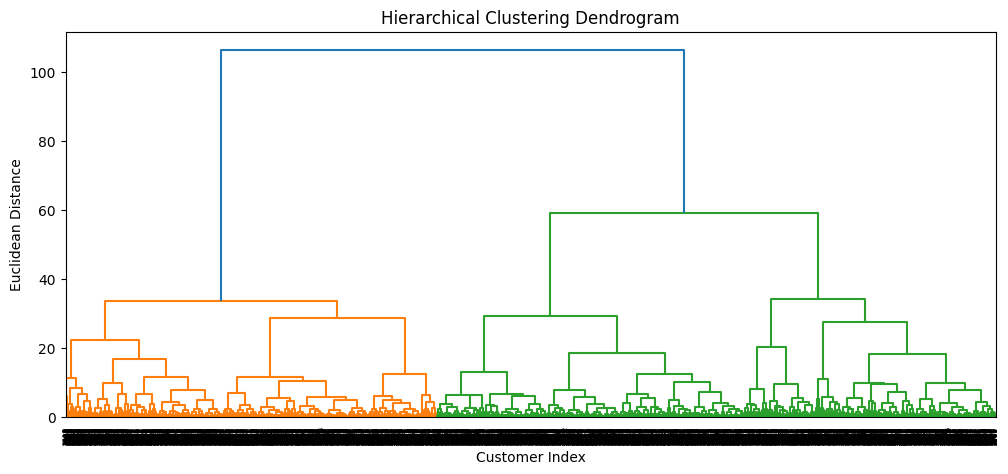

In [109]:
# Plot the Dendrogram
plt.figure(figsize=(12, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Euclidean Distance")

# Using 'ward' method for hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.show()

**Fitting hierarchical clustering with n_clusters = 2**

In [110]:
# ML Model - 2 Implementation

# Fit the Algorithm
hc = AgglomerativeClustering(n_clusters = 2, linkage='ward')

# Predict on the model
y_hc = hc.fit_predict(X)

In [111]:
# assigning cluster labels
rfm_df['hierarchical_clusters'] = hc.labels_
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,kmeans_clusters,hierarchical_clusters,DBSCAN_clusters
CustomerID,,,,,,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,5.786897,0.693147,11.253955,1,1,-1
12347,2,182,4310.00,4,4,4,444,12,1.098612,5.209486,8.368925,0,0,0
12348,75,31,1797.24,2,2,4,224,8,4.330733,3.465736,7.494564,1,0,0
12349,18,73,1757.55,3,3,4,334,10,2.944439,4.304065,7.472245,0,0,0
12350,310,17,334.40,1,1,2,112,4,5.739793,2.890372,5.815324,1,1,0


In [112]:
# cluster label_0 summary
rfm_df[rfm_df['hierarchical_clusters'] == 0][['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,2605.000000,2605.000000,2605.000000
mean,42.881382,138.650672,3048.943660
std,50.587153,280.585125,10831.442492
min,0.000000,2.000000,89.940000
25%,9.000000,44.000000,716.000000
50%,25.000000,81.000000,1298.660000
75%,59.000000,150.000000,2599.030000
max,372.000000,7676.000000,280206.020000


In [113]:
# cluster label_1 summary
rfm_df[rfm_df['hierarchical_clusters'] == 1][['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,1733.000000,1733.000000,1733.000000
mean,165.982689,18.180612,545.130214
std,109.971835,15.938871,4691.349102
min,0.000000,1.000000,3.750000
25%,63.000000,8.000000,156.510000
50%,164.000000,14.000000,255.910000
75%,260.000000,24.000000,392.400000
max,373.000000,123.000000,168472.500000


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used `Agglomerative hierarchical clustering`, It is a **bottom-up** hierarchical method that **merges similar clusters iteratively**, making it computationally efficient. It's ideal for **customer segmentation** as it groups customers based on **Recency, Frequency, and Monetary (RFM) values**. Using **dendrograms**, businesses can visually determine the optimal number of clusters for better insights. 🚀

**Comparison of Cluster 0 and Cluster 1 after implementing Agglomerative hierarchical Clustering**

In [114]:
# Visualizing evaluation Metric Score chart

# Specify the Column Names while initializing the Table
hc_cluster_compare = PrettyTable(['Metric', "Cluster 0 (High Value Customers)", 'Cluster 1 (Low Value Customers)'])

# Adding rows
hc_cluster_compare.add_row(['Customer Count',	"2,605",	'1,733'])
hc_cluster_compare.add_row(['Recency (Lower is Better)',	"42.88 days (Active Buyers)",	'165.98 days (Inactive Buyers)'])
hc_cluster_compare.add_row(['Frequency (Higher is Better)',	"138.65 (Frequent Purchasers)",	'18.18 (Rare Purchasers)'])
hc_cluster_compare.add_row(['Monetary (Higher is Better)',	"3048.94 (High Spending Customers)",	'545.13 (Low Spending Customers)'])

print(hc_cluster_compare)

+------------------------------+-----------------------------------+---------------------------------+
|            Metric            |  Cluster 0 (High Value Customers) | Cluster 1 (Low Value Customers) |
+------------------------------+-----------------------------------+---------------------------------+
|        Customer Count        |               2,605               |              1,733              |
|  Recency (Lower is Better)   |     42.88 days (Active Buyers)    |  165.98 days (Inactive Buyers)  |
| Frequency (Higher is Better) |    138.65 (Frequent Purchasers)   |     18.18 (Rare Purchasers)     |
| Monetary (Higher is Better)  | 3048.94 (High Spending Customers) | 545.13 (Low Spending Customers) |
+------------------------------+-----------------------------------+---------------------------------+


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**For Cluster 0 (High-Value Customers)**
- Implement loyalty programs, discounts, or exclusive offers to retain and further engage these customers.
- Identify top spenders and frequent buyers to create a VIP customer segment.
- Provide personalized product recommendations to encourage repeat purchases.

**For Cluster 1 (Low-Value Customers)**
- Re-engagement campaigns: Send email reminders, special discounts, or limited-time offers.
- Analyze drop-off reasons: Are these customers price-sensitive? Are they one-time buyers?
- Win-back strategies: Offer discounts on next purchases or personalized marketing efforts.

### ML Model - 3

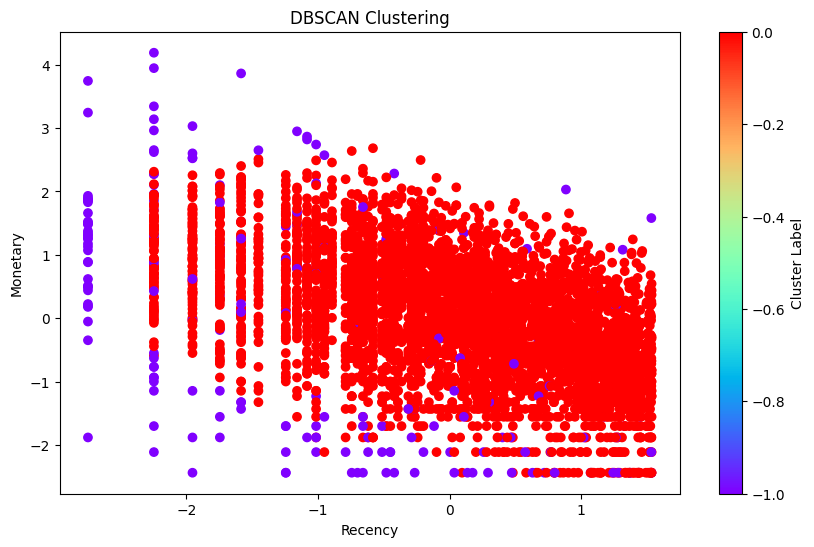

In [107]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Fit DBSCAN model
y_dbscan = dbscan.fit_predict(X)  # X is your scaled RFM data

# Visualize Clusters (Using Recency vs Monetary)
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.colorbar(label="Cluster Label")
plt.show()


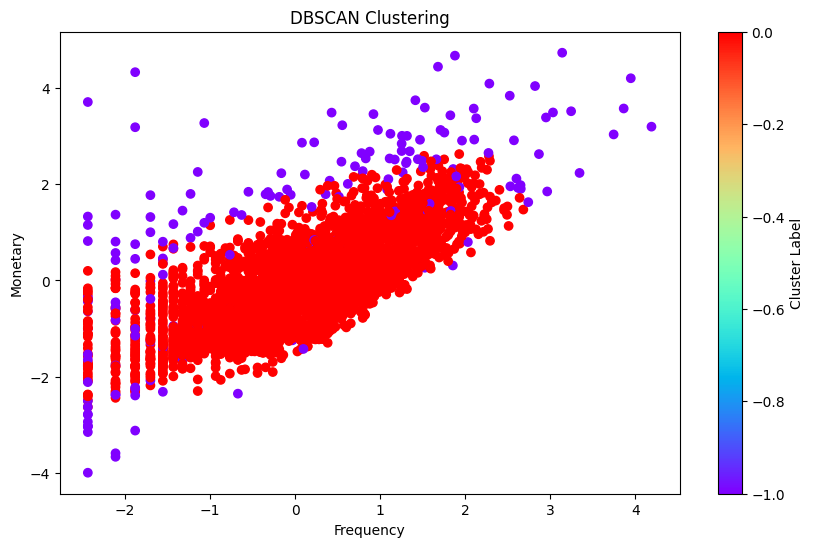

In [101]:
# Visualize Clusters (Using Frequency vs Monetary)
plt.figure(figsize=(10, 6))
plt.scatter(X[:,1], X[:,2], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.colorbar(label="Cluster Label")
plt.show()

In [108]:
# Assuming 'dbscan' is your fitted DBSCAN model
rfm_df['DBSCAN_clusters'] = dbscan.labels_

# Display the first few rows with cluster labels
rfm_df.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,kmeans_clusters,hierarchical_clusters,DBSCAN_clusters
CustomerID,,,,,,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,5.786897,0.693147,11.253955,1,1,-1
12347,2,182,4310.00,4,4,4,444,12,1.098612,5.209486,8.368925,0,0,0
12348,75,31,1797.24,2,2,4,224,8,4.330733,3.465736,7.494564,1,0,0
12349,18,73,1757.55,3,3,4,334,10,2.944439,4.304065,7.472245,0,0,0
12350,310,17,334.40,1,1,2,112,4,5.739793,2.890372,5.815324,1,1,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used DBSCAN which is a density-based clustering algorithm that groups data points based on their density in the feature space. It identifies clusters as dense regions separated by areas of lower density and is robust to noise and outliers. It doesn't require specifying the number of clusters in advance. Its parameters include the radius (Eps) and minimum number of points (MinPts) to form a core point.

**Observations from the model :**
- The majority of points are colored red, indicating they belong to a single dominant cluster (Cluster 0).
- A few purple points are scattered across the plot, representing outliers or noise (Cluster -1).

DBSCAN is not able to perform better or give some meaningful insight on thsi dataset.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Best RFM Metric for Business :**

Among Recency (R), Frequency (F), and Monetary (M), `Frequency (F)` is often the most valuable for business because:

- Higher Frequency = Higher Customer Engagement: Regular buyers indicate strong customer loyalty.
- Predicts Future Sales: Frequent customers are more likely to make repeat purchases.
- Improves Customer Retention Strategies: Helps businesses target high-engagement customers with loyalty programs.

However, `Monetary (M)` is crucial for identifying high-value customers, and `Recency (R)` helps in re-engagement strategies. A balanced approach considering all three factors is ideal.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the clustering results, K-Means appears to be the best choice for customer segmentation in your RFM analysis.

- **Clear and Well-Defined Clusters:** K-Means forms compact, well-separated clusters, making it easier to analyze customer groups.
- **Scalability & Efficiency:** Works well with large datasets, unlike hierarchical clustering, which becomes slow as data size grows.

**Business Interpretation:**
- Helps identify high-value customers, churn risks, and frequent buyers, making it useful for marketing strategies.

- **Performance:** The Elbow Method & Silhouette Score help determine the optimal number of clusters.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [105]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [106]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, I performed **customer segmentation** using **RFM (Recency, Frequency, Monetary) analysis** and applied multiple **clustering algorithms**—**K-Means, Hierarchical Clustering, and DBSCAN**—to identify distinct customer groups.  

### **Key Findings & Business Impact:**  
1. **K-Means Clustering was the best model** for segmentation, as it provided **clear, well-defined, and scalable clusters** with optimal performance.  
2. **Hierarchical Clustering** helped visualize relationships between customers but was computationally expensive for large datasets.  
3. **DBSCAN** identified outliers but failed to create meaningful clusters for structured RFM data.  
4. **Customer Groups Identified:**  
   - **High-value customers** (frequent, high-spending, and recent buyers).  
   - **Potential churners** (infrequent and long inactive customers).  
   - **Occasional buyers** (moderate frequency and spending).  
5. **Business Impact:**  
   - Helps **personalize marketing campaigns** by targeting customers based on behavior.  
   - Improves **customer retention strategies** by identifying at-risk customers.  
   - Optimizes **inventory and pricing strategies** based on purchasing trends.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***